# 实验报告

In [19]:
import pdfplumber
import re
import os
import pandas as pd
from matplotlib import pyplot as plt 
import matplotlib

### 遍历文件里所有pdf

In [20]:
def file(file_dir):
    file1=[]
    for files in os.walk(file_dir):
        for file in files[2]:
            file1.append(file_dir+'\\'+file)
    return file1
a=file(r'C:\Users\笨笨笨\Desktop\qwp\2019.4')
print(a)

['C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300081：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300161：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300174：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300235：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300428：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300442：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300451：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300460：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300492：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300502：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300504：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300505：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300519：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300528：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300538：2019年年度报告.pdf', 'C:\\Users\\笨笨笨\\Desktop\\qwp\\2019.4\\300547：2019年年度报告.pdf', 'C:\\Us

### 寻找pdf中我们需要的信息

In [21]:
def pdf_infor(pdfx):
    pdf=pdfplumber.open(pdfx)
    text_all=[]
    for n in range(1,40): 
        page = pdf.pages[n]
        text1 = page.extract_text()
        if text1 != None:
            text_all += text1
        else:
            pass
    text_all=''.join('%s' %id for id in text_all)
    text2= ''.join(re.findall("一、公司信息(.*?)二、联系人和联系方式",text_all,re.S))
    text3=re.sub(' ','',text2)
    company_infor={}
    company_infor['股票简称']=re.search('股票简称(.*?)股票代码',text3).group(1)
    company_infor['股票代码']=re.search("股票代码(\w\w\w\w\w\w)",text3).group(1)
    company_infor['公司法人']=re.search("公司的法定代表人(.*?)\n",text3).group(1)
    company_infor['办公地址']=re.search("办公地址(.*?)\n",text3).group(1)
    company_infor['公司网址']=re.search("公司国际互联网网址(.*?)\n",text3).group(1)
    company_infor['电子信箱']=re.search("电子信箱(.*?)\n",text3).group(1)
    text4= ''.join(re.findall("五、主要会计数据和财务指标(.*?)六、分季度主要财务指标",text_all,re.S))
    cf1 = re.findall(r'资产总额（元）(.*?)\n', text4)   
    cf1= " ".join(str(i) for i in cf1)
    cf2= re.findall(r'\d*\,?\d*\,?\d*\,?\d+\.?\d\d', cf1)
    b=cf2[0]
    company_infor['2019']=b
    c=cf2[1]
    company_infor['2018']=c
    d=cf2[3]
    company_infor['2017']=d
    pdf.close()
    return company_infor

### 进行整合所有公司信息

In [22]:
list_all=[]
for each in a:
    list_all.append(pdf_infor(each))
print(list_all)

[{'股票简称': '恒信东方', '股票代码': '300081', '公司法人': '孟宪民', '办公地址': '北京市海淀区蓝靛厂南路牛顿办公区北区11层', '公司网址': 'http://www.hxgro.com/', '电子信箱': 'office@hxgro.com', '2019': '3,153,703,319.58', '2018': '3,227,449,153.95', '2017': '2,361,675,636.33'}, {'股票简称': '华中数控', '股票代码': '300161', '公司法人': '陈吉红', '办公地址': '武汉市东湖开发区华工科技园', '公司网址': 'www.huazhongcnc.com', '电子信箱': 'hcnc@hzncc.com', '2019': '2,367,976,073.86', '2018': '2,474,321,978.86', '2017': '2,325,908,914.38'}, {'股票简称': '元力股份', '股票代码': '300174', '公司法人': '许文显', '办公地址': '福建省南平市陈坑至瓦口工业园区办公地址的邮政编码353013', '公司网址': 'www.yuanlicarbon.com电子信箱dm@yuanlicarbon.com', '电子信箱': 'dm@yuanlicarbon.com', '2019': '1,317,285,147.72', '2018': '1,606,273,502.25', '2017': '1,350,422,564.61'}, {'股票简称': '方直科技', '股票代码': '300235', '公司法人': '黄元忠', '办公地址': '深圳市南山区大新路198号创新大厦B座9楼', '公司网址': 'www.kingsunedu.com', '电子信箱': 'kingsunsoft@kingsunsoft.com', '2019': '655,996,153.98', '2018': '624,266,087.24', '2017': '608,796,383.19'}, {'股票简称': '四通新材', '股票代码': '300428', '公司法人': '臧立国', '办公地址': '

### 输出为二维表格

In [23]:
df = pd.DataFrame(list_all)
df

2017              2018              2019          公司法人  \
0   2,361,675,636.33  3,227,449,153.95  3,153,703,319.58           孟宪民   
1   2,325,908,914.38  2,474,321,978.86  2,367,976,073.86           陈吉红   
2   1,350,422,564.61  1,606,273,502.25  1,317,285,147.72           许文显   
3     608,796,383.19    624,266,087.24    655,996,153.98           黄元忠   
4   6,414,591,419.59  6,588,172,299.88  6,852,510,974.00           臧立国   
5   1,665,455,953.19  1,508,553,295.44  1,542,939,720.72           姜卫东   
6   2,698,990,624.51  3,078,548,332.90  3,589,661,923.11            葛航   
7   1,113,849,324.45    992,175,976.08    805,957,053.72           赵积清   
8     387,988,454.50    403,633,450.68    372,274,088.22            陈栗   
9   1,402,358,491.57  1,379,534,727.78  1,665,182,568.13           高光荣   
10  1,967,838,627.04  2,950,399,671.91  2,507,679,075.41           李世宏   
11    890,673,843.15  1,041,739,090.04  1,446,755,090.96            刘甍   
12    775,047,461.09    822,499,972.11    861,130,616.44           王岳钧   
13  3,359,175,606.50  2,365,595,824.89  2,558,581,428.47           蒋小平   
14    569,548,771.08    619,908,318.86    913,936,629.23           邵羽南   
15    919,240,089.01    971,215,806.10    973,726,031.40           文谟统   
16    687,195,289.62    718,068,403.10    766,469,739.72    ZHUWEI(朱伟)   
17  1,018,583,520.79  1,110,464,587.75  1,270,991,770.48           林大耀   
18    618,622,613.22    500,505,791.28    610,335,399.88            邬涛   
19    523,868,979.29    589,719,124.18    668,003,716.12  ALEXANDERLIU   
20             37.26    800,552,646.25  1,098,866,194.52            樊彬   
21             31.17  1,062,305,962.92  1,393,471,331.54           张世龙   

                                           公司网址  \
0                         http://www.hxgro.com/   
1                           www.huazhongcnc.com   
2   www.yuanlicarbon.com电子信箱dm@yuanlicarbon.com   
3                            www.kingsunedu.com   
4                        http://www.stnm.com.cn   
5                                www.cn-pls.com   
6                     https://www.bsoft.com.cn/   
7                         http://www.dgylec.com   
8                   http://www.cendes-arch.com/   
9                             www.eoptolink.com   
10                             www.tianyisc.com   
11                       http://www.cjnphos.com   
12                      http://www.xgpharma.com   
13                       http://www.omnijoi.com   
14                        www.tongyiplastic.com   
15                            www.chuanhuan.com   
16                 http://www.broadex-tech.com/   
17                    http://www.wanlima.com.cn   
18                   http://www.shunyagroup.com   
19              http://www.doctorglasses.com.cn   
20                       http://www.zjyfxc.com/   
21                             www.sg-micro.com   

                                         办公地址                         电子信箱  \
0                       北京市海淀区蓝靛厂南路牛顿办公区北区11层             office@hxgro.com   
1                               武汉市东湖开发区华工科技园               hcnc@hzncc.com   
2              福建省南平市陈坑至瓦口工业园区办公地址的邮政编码353013          dm@yuanlicarbon.com   
3                       深圳市南山区大新路198号创新大厦B座9楼  kingsunsoft@kingsunsoft.com   
4                              保定市清苑区发展西街359号             info@stnm.com.cn   
5                            上海市金山区张堰镇金张支路84号               pls@cn-pls.com   
6                    杭州市滨江区长河街道越达巷92号创业智慧大厦五楼           bsoft@bsoft.com.cn   
7                           广东省东莞市黄江镇黄江东环路68号                yl@dgylec.com   
8                      成都市锦江区东大街芷泉段6号1栋1单元37层   cendes.bso@cendes-arch.com   
9                           成都市双流区公兴镇物联西街127号             ir@eoptolink.com   
10                        四川省大邑县晋原镇雪山大道一段198号            tykh@tianyisc.com   
11                       云南省昆明市呈贡区上海东盟大厦A座10楼              cjncc61@163.com   
12                          浙江省嵊州市剡湖街道环城西路25号             xgpharma@163.com   
13                             南京市栖霞区元化路8号28幢  

### 将图表至于中间,并设置图表中的默认字体

In [24]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 输出图表

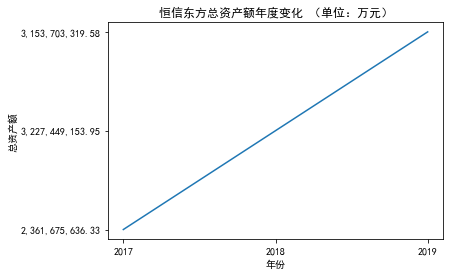

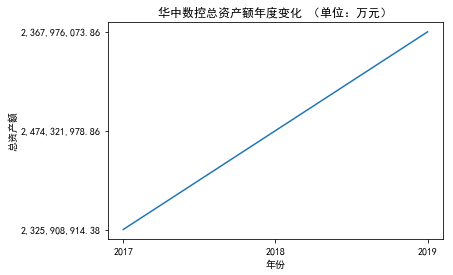

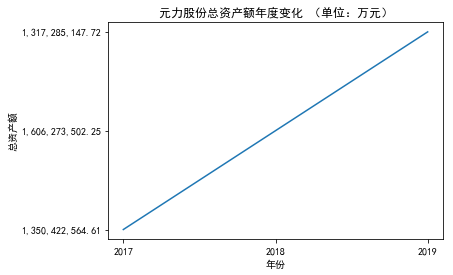

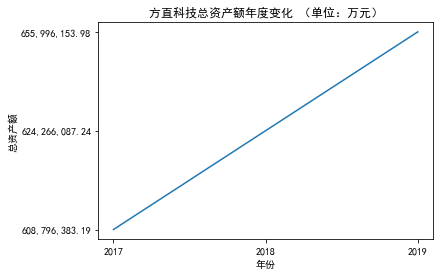

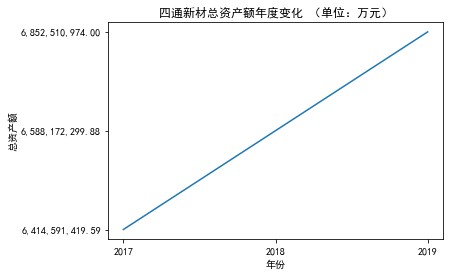

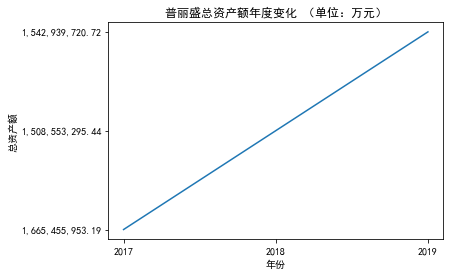

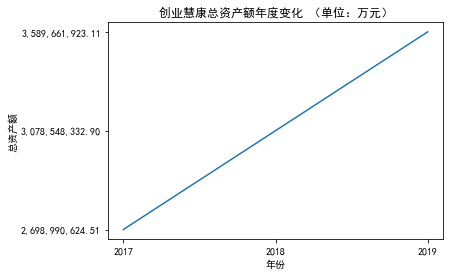

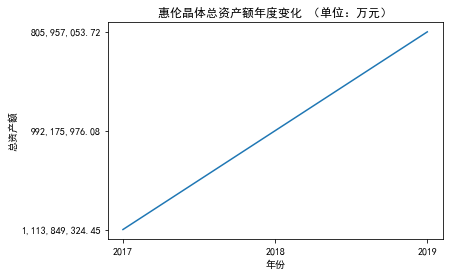

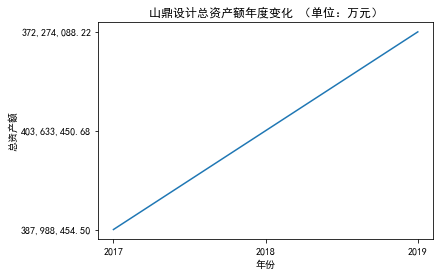

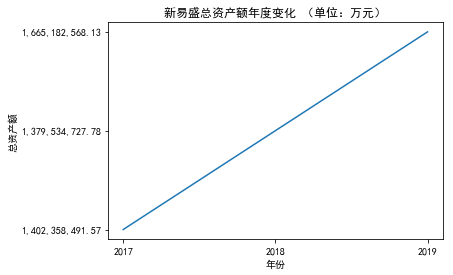

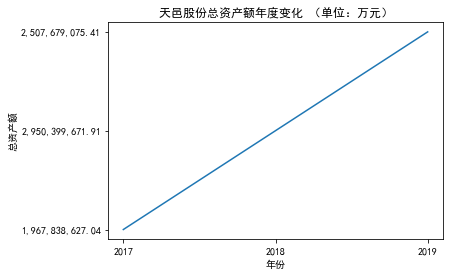

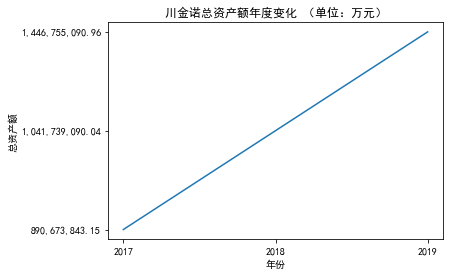

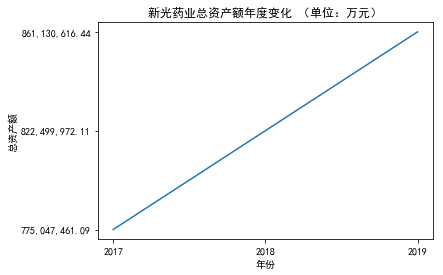

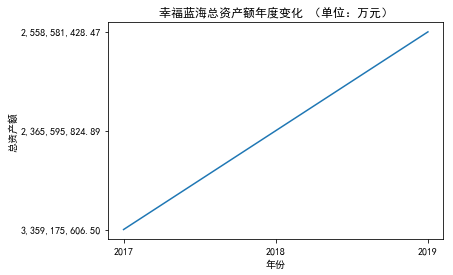

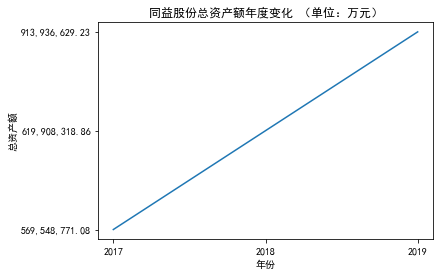

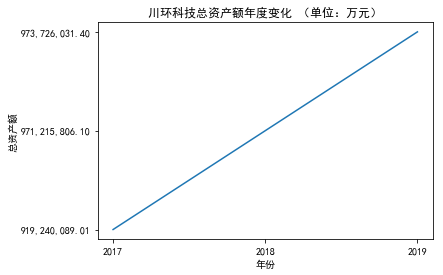

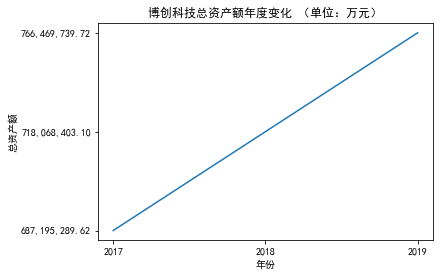

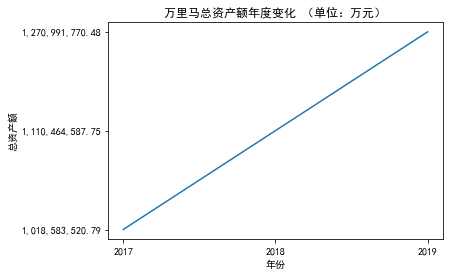

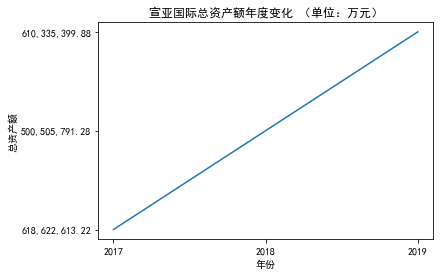

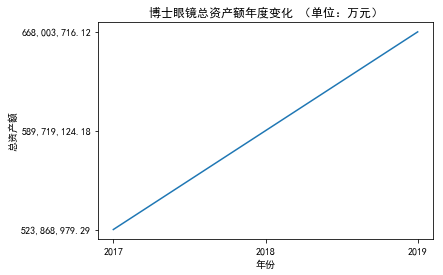

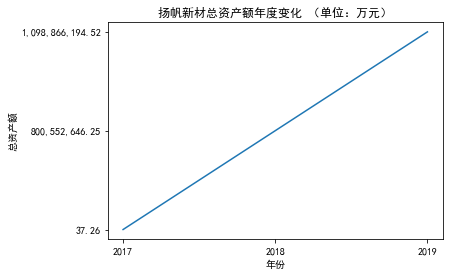

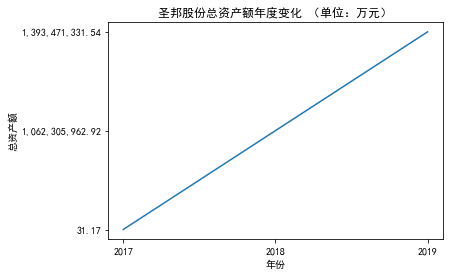

In [25]:
for item in list_all:
    e=item['股票简称']
    f=item['2017']
    g=item['2018']
    h=item['2019']
    x = ['2017','2018','2019'] 
    y = [f,g,h]
    plt.title(str(e)+"总资产额年度变化 （单位：万元）") 
    plt.xlabel("年份")
    plt.ylabel("总资产额")
    plt.plot(x,y) 
    plt.show()

分析：观察上面的图表，我们能发现，这些图表中的线几乎都是呈上升趋势。那么就意味着从2017-2019年，这22家公司的资产总额都是逐渐上升的。这也进一步的表示，公司资产总额的上升，表明该公司的基本面基础几乎是良好的。同时也可以推测这三年内的宏观经济环境也是良好的。